# kaggle泰坦尼克实战2.0

参考多篇文章，加强对数据的认识，不再凭直觉进行特征选择    
参考文章  
https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic
https://zhuanlan.zhihu.com/p/27655949  
http://www.jasongj.com/ml/classification/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 加载数据

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 探索数据

探索数据前需分出一部分测试集，避免受主观影响

In [80]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(train_data,test_size=0.2,random_state=42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            572 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          159 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


可以看到age，cabin，Embarked都有缺失值

In [8]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived均值为0.37表明大约三分之一的人获救

In [9]:
corr_matrix = train_set.drop('PassengerId',axis=1).corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.321750,-0.059695,-0.047602,0.078311,0.246641
Pclass,-0.321750,1.000000,-0.355950,0.086933,0.012679,-0.546794
Age,-0.059695,-0.355950,1.000000,-0.320916,-0.207040,0.088103
SibSp,-0.047602,0.086933,-0.320916,1.000000,0.440355,0.153011
Parch,0.078311,0.012679,-0.207040,0.440355,1.000000,0.222180
Fare,0.246641,-0.546794,0.088103,0.153011,0.222180,1.000000


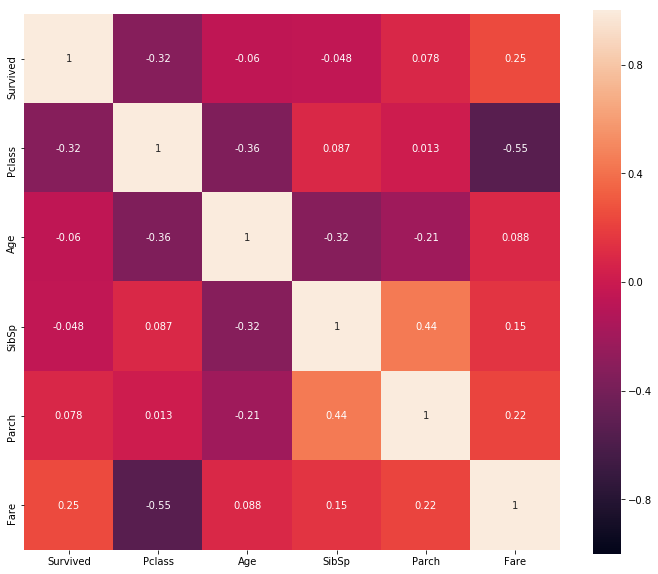

In [10]:
ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1 , annot=True , square=True)

通过相关分析，初步判断特征之间的相关关系

## Survived 与 Pclass

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


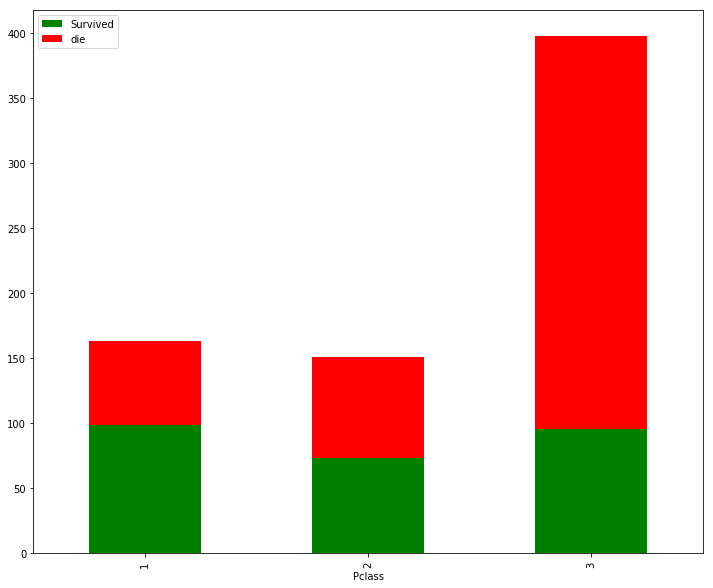

In [11]:
train_set['die'] = 1 - train_set['Survived']
train_set.groupby(['Pclass']).agg('sum')[['Survived','die']].plot(kind='bar', figsize=(12, 10),
                                                          stacked=True, color=['g', 'r'])

可以看到每个等级的获救几率不同，等级3的几率最小，这是一个关键的特征，从相关关系也能看出

## Survived 与 Name

通过观察可以发现名字前面都有一个称谓，先提取称谓再观察是否是一个有用特征

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [14]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [15]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles(train_data):
    train_data['Title'] = train_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    train_data['Title'] = train_data.Title.map(Title_Dictionary)
    return train_data

In [16]:
get_titles(train_set)
train_set.head()

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,die,Title
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,1,Mr
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,1,Mr
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,1,Mr
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,1,Mr
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,1,Miss


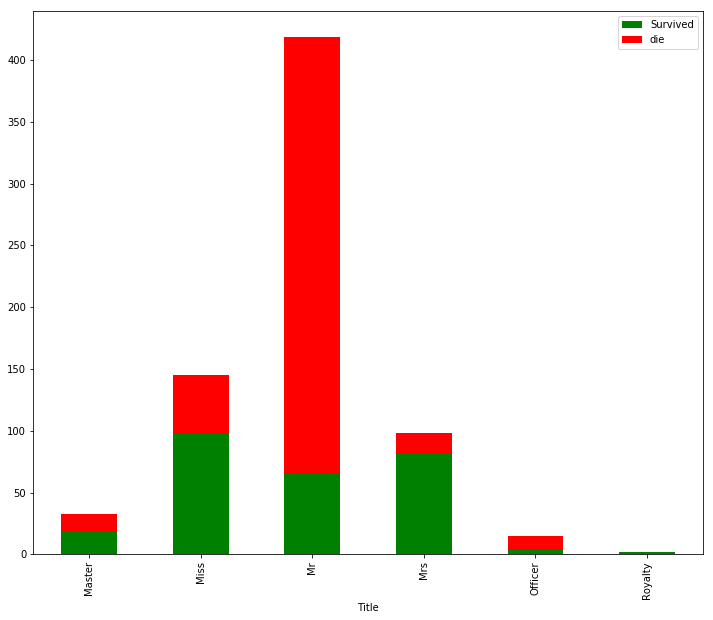

In [17]:
train_set.groupby(['Title']).agg('sum')[['Survived','die']].plot(kind='bar',figsize=(12,10),
                                                              stacked=True,color=['g','r'])

可以看出女士的获救率较高，男士和船员的获救率较低

## Survived 与 Sex

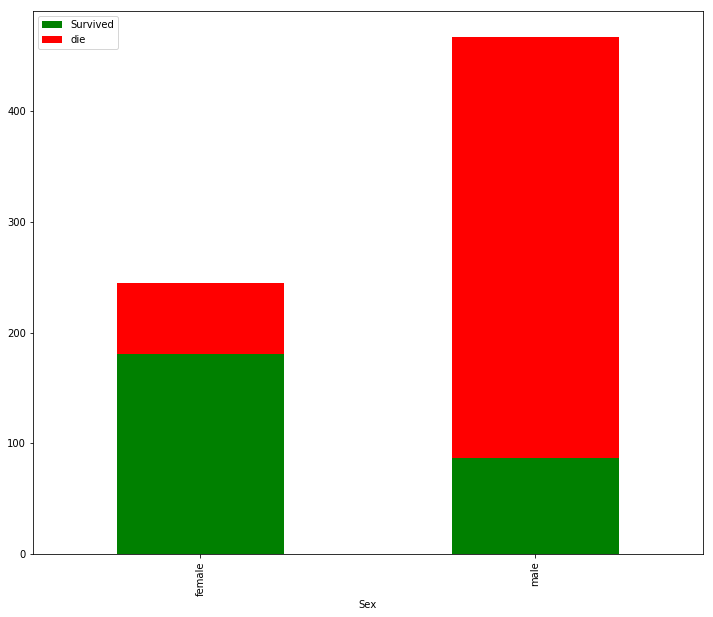

In [18]:
train_set.groupby(['Sex']).agg('sum')[['Survived','die']].plot(kind='bar',figsize=(12,10),
                                                       stacked=True,color=['g','r'])

可以看出女士的获救率比男士高，也印证了上面名字特征的结果

## Survived 与 Age

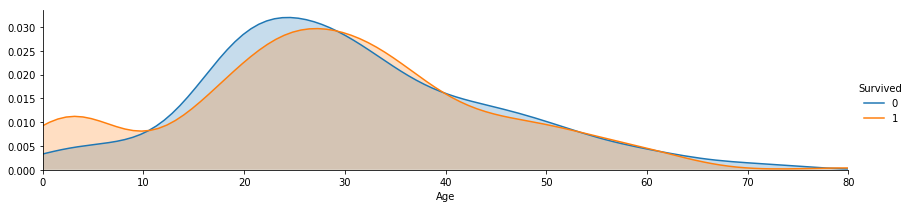

In [19]:
facet = sns.FacetGrid(train_set, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_set['Age'].max()))
facet.add_legend()

可以看出0-10岁左右的获救率较高，通过性别和年龄都表明了背景‘让妇女儿童先走’，这2个是重要的特征

## Survived 与 SibSp

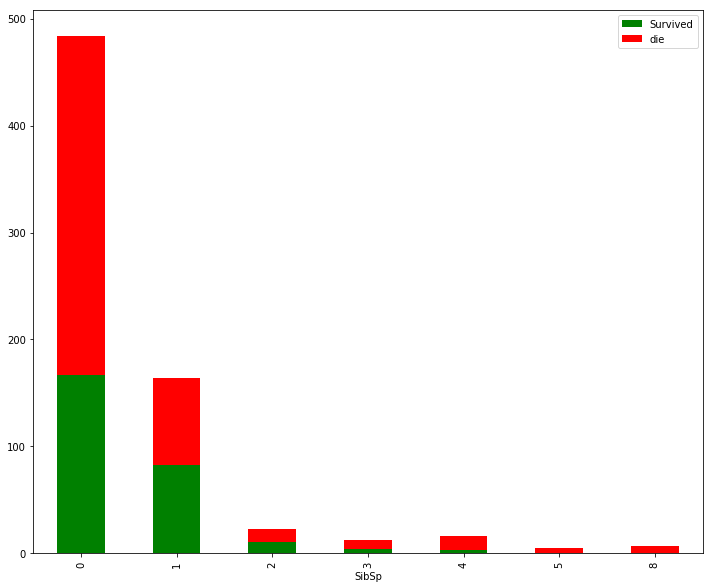

In [20]:
train_set.groupby(['SibSp']).agg('sum')[['Survived','die']].plot(kind='bar',figsize=(12,10),
                                                       stacked=True,color=['g','r'])

## Survived 与 Parch

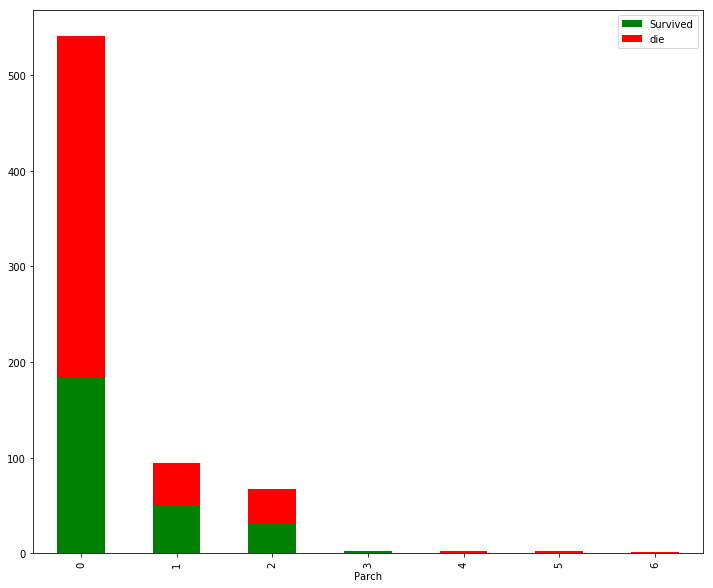

In [21]:
train_set.groupby(['Parch']).agg('sum')[['Survived','die']].plot(kind='bar',figsize=(12,10),
                                                       stacked=True,color=['g','r'])

## Survived 与 Fare

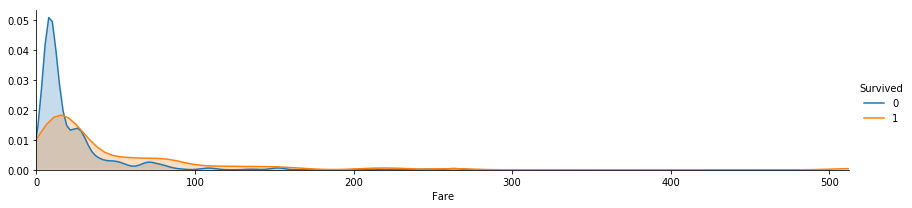

In [22]:
facet = sns.FacetGrid(train_set, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_set['Fare'].max()))
facet.add_legend()

可以看到票价越高，获救率就越高

## Survived 与 Cabin

cabin缺失值太多了，可以在使用时去掉

## Survived 与 Embarked

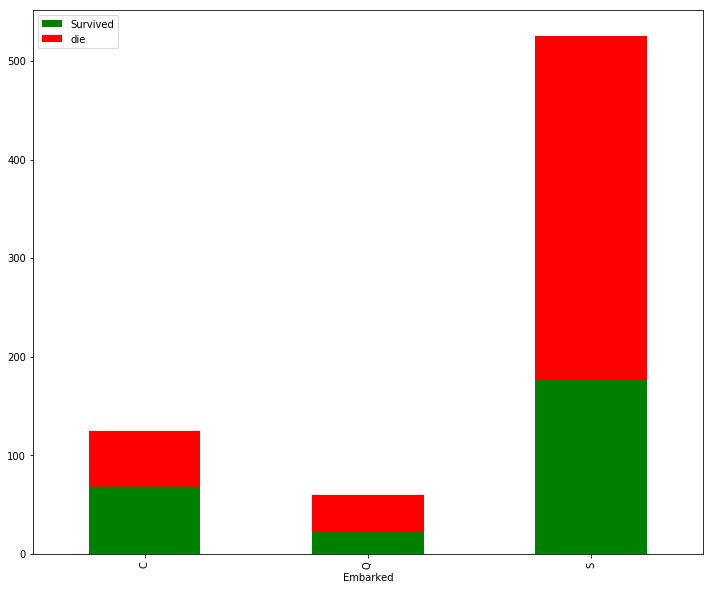

In [23]:
train_set.groupby(['Embarked']).agg('sum')[['Survived','die']].plot(kind='bar',figsize=(12,10),
                                                       stacked=True,color=['g','r'])

可以看出，S的人数较多，获救率较低，可能也是更财富地位有关

# 准备数据

## 删除不需要的特征

In [24]:
train_set = train_set.drop(['PassengerId','Ticket','Name','Cabin','die'],axis=1)

In [25]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
331,0,1,male,45.5,0,0,28.5000,S,Mr
733,0,2,male,23.0,0,0,13.0000,S,Mr
382,0,3,male,32.0,0,0,7.9250,S,Mr
704,0,3,male,26.0,1,0,7.8542,S,Mr
813,0,3,female,6.0,4,2,31.2750,S,Miss


## 处理缺失值

In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         572 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    710 non-null object
Title       712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [27]:
train_set[train_data['Embarked'].isna()]

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
829,1,1,female,62.0,0,0,80.0,NaN,Mrs
61,1,1,female,38.0,0,0,80.0,NaN,Miss


In [28]:
train_set.loc[61,'Embarked'] = 'C'
train_set.loc[829,'Embarked'] = 'C'

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         572 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
Title       712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 75.6+ KB


In [30]:
group_train = train_set.groupby(['Sex','Pclass','Title'])
group_median_train = group_train.median()
group_median_train

Survived    Age  SibSp  Parch       Fare
Sex    Pclass Title                                            
female 1      Miss          1.0  30.00    0.0    0.0  113.27500
              Mrs           1.0  39.00    1.0    0.0   76.72920
              Royalty       1.0  40.50    0.5    0.0   63.05000
       2      Miss          1.0  24.00    0.0    0.0   13.00000
              Mrs           1.0  30.50    1.0    0.0   23.50000
       3      Miss          0.0  18.00    0.0    0.0    9.70625
              Mrs           1.0  31.00    1.0    1.0   15.85000
male   1      Master        1.0   2.46    0.5    2.0  116.70415
              Mr            0.0  38.50    0.0    0.0   50.24790
              Officer       0.0  51.00    0.0    0.0   35.50000
       2      Master        1.0   1.50    1.0    1.0   26.00000
              Mr            0.0  30.00    0.0    0.0   13.00000
              Officer       0.0  52.50    0.0    0.0   13.50000
       3      Master        0.0   4.00    4.0    1.0   29.12500
              Mr            0.0  27.00    0.0    0.0    7.89580

In [31]:
group_median_train = group_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
group_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.00
1,female,1,Mrs,39.00
2,female,1,Royalty,40.50
3,female,2,Miss,24.00
4,female,2,Mrs,30.50
5,female,3,Miss,18.00
6,female,3,Mrs,31.00
7,male,1,Master,2.46
8,male,1,Mr,38.50
9,male,1,Officer,51.00


In [32]:
def fill_age(row):
    condition=(
        (group_median_train['Sex'] == row['Sex']) &
        (group_median_train['Title'] == row['Title']) &
        (group_median_train['Pclass'] == row['Pclass'])
    )
    return group_median_train[condition]['Age'].values[0]

In [33]:
train_set['Age'] = train_set.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'],axis=1)

In [34]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
Title       712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 75.6+ KB


## 文本特征转数字特征

In [35]:
train_set['Sex'] = pd.factorize(train_set['Sex'])[0]
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
331,0,1,0,45.5,0,0,28.5000,S,Mr
733,0,2,0,23.0,0,0,13.0000,S,Mr
382,0,3,0,32.0,0,0,7.9250,S,Mr
704,0,3,0,26.0,1,0,7.8542,S,Mr
813,0,3,1,6.0,4,2,31.2750,S,Miss


In [36]:
train_set = pd.concat([train_set,pd.get_dummies(train_set['Embarked'])],axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,C,Q,S
331,0,1,0,45.5,0,0,28.5000,S,Mr,0,0,1
733,0,2,0,23.0,0,0,13.0000,S,Mr,0,0,1
382,0,3,0,32.0,0,0,7.9250,S,Mr,0,0,1
704,0,3,0,26.0,1,0,7.8542,S,Mr,0,0,1
813,0,3,1,6.0,4,2,31.2750,S,Miss,0,0,1


In [37]:
train_set = pd.concat([train_set,pd.get_dummies(train_set['Title'])],axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
331,0,1,0,45.5,0,0,28.5000,S,Mr,0,0,1,0,0,1,0,0,0
733,0,2,0,23.0,0,0,13.0000,S,Mr,0,0,1,0,0,1,0,0,0
382,0,3,0,32.0,0,0,7.9250,S,Mr,0,0,1,0,0,1,0,0,0
704,0,3,0,26.0,1,0,7.8542,S,Mr,0,0,1,0,0,1,0,0,0
813,0,3,1,6.0,4,2,31.2750,S,Miss,0,0,1,0,1,0,0,0,0


In [38]:
train_set = train_set.drop(['Embarked','Title'],axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
331,0,1,0,45.5,0,0,28.5000,0,0,1,0,0,1,0,0,0
733,0,2,0,23.0,0,0,13.0000,0,0,1,0,0,1,0,0,0
382,0,3,0,32.0,0,0,7.9250,0,0,1,0,0,1,0,0,0
704,0,3,0,26.0,1,0,7.8542,0,0,1,0,0,1,0,0,0
813,0,3,1,6.0,4,2,31.2750,0,0,1,0,1,0,0,0,0


## 特征缩放

In [39]:
y_train = train_set['Survived']
train_set = train_set.drop(['Survived'],axis=1 )

In [40]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(train_set)

StandardScaler(copy=True, with_mean=True, with_std=True)

## 完成数据

In [41]:
X_train = std.transform(train_set)
X_train.shape,y_train.shape

((712, 15), (712,))

# 模型

## 特征选择

In [42]:
from sklearn.ensemble import RandomForestClassifier
rng_clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')
rng_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rng_clf.feature_importances_

array([0.08323319, 0.13389601, 0.21705698, 0.04813176, 0.0351244 ,
       0.25220796, 0.0131399 , 0.0079975 , 0.01342768, 0.01614651,
       0.0223068 , 0.10760551, 0.04293432, 0.00628154, 0.00050993])

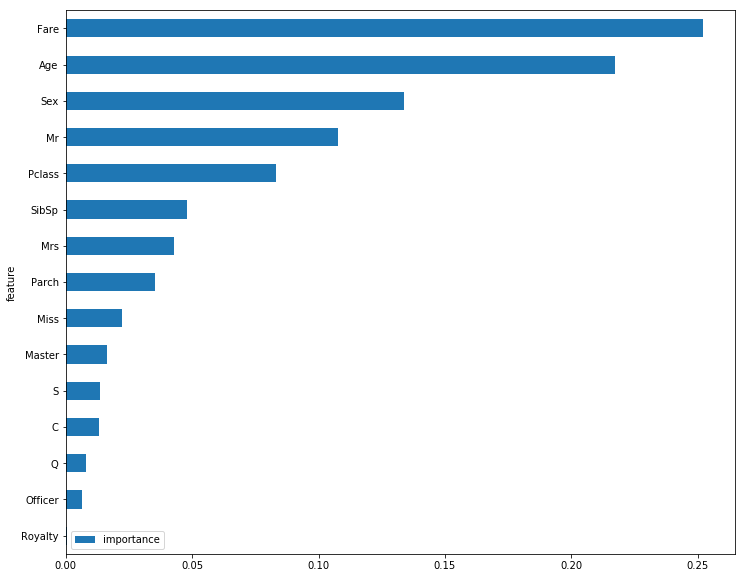

In [44]:
features = pd.DataFrame()
features['feature'] = train_set.columns
features['importance'] = rng_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',figsize=(12,10))

In [45]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rng_clf, prefit=True)
X_train_reduced = model.transform(X_train)
X_train_reduced.shape

(712, 5)

In [46]:
X_train = X_train[:,:14]
X_train.shape

(712, 14)

通过树的估算器可用于计算特征重要性，进而筛选不重要的特征。这里特征不多，就直接全部用上

## 尝试不同的模型

### logistics模型

In [47]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train,y_train)
y_log_pred = log_clf.predict(X_train)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_log_pred,y_train)

0.8356741573033708

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf,X_train,y_train,cv=3)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.81092437, 0.85232068, 0.84388186])

### 决策树

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_dt_pred = dt_clf.predict(X_train)
accuracy_score(y_dt_pred,y_train)

0.9803370786516854

In [51]:
cross_val_score(dt_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.77310924, 0.76371308, 0.75105485])

###  随机森林

In [52]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train,y_train)
y_rnd_pred = rnd_clf.predict(X_train)
accuracy_score(y_rnd_pred,y_train)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9592696629213483

In [53]:
cross_val_score(rnd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.78151261, 0.79324895, 0.8185654 ])

决策树和随机森林未约束的模型都过拟合严重，对随机森林进行超参数组合调试模型

## 模型微调

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
parameter_grid = {
                 'max_depth' : [2, 3, 4, 5, 6, 7, 8],
                 'n_estimators': [10,20,30,40,50],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 5, 10],
                 'min_samples_leaf': [1, 3, 5, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=3)

grid_search = GridSearchCV(forest,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1
                            )

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


[Parallel(n_jobs=1)]: Done 10080 out of 10080 | elapsed:  7.1min finished


In [55]:
parameters

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [56]:
model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_frac...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
      

In [57]:
y_rnd_pred = model.predict(X_train)
accuracy_score(y_rnd_pred,y_train)

0.8946629213483146

In [58]:
cross_val_score(rnd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.78151261, 0.79324895, 0.8185654 ])

# 测试集上运行

In [81]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null object
Age            142 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Ticket         179 non-null object
Fare           179 non-null float64
Cabin          45 non-null object
Embarked       179 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [82]:
get_titles(test_set)
test_set.head()

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,Mr
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Mr
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,Miss
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,Miss


In [83]:
test_set = test_set.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)
test_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
709,1,3,male,NaN,1,1,15.2458,C,Master
439,0,2,male,31.0,0,0,10.5000,S,Mr
840,0,3,male,20.0,0,0,7.9250,S,Mr
720,1,2,female,6.0,0,1,33.0000,S,Miss
39,1,3,female,14.0,1,0,11.2417,C,Miss


In [84]:
test_set['Age'] = test_set.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'],axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 9 columns):
Survived    179 non-null int64
Pclass      179 non-null int64
Sex         179 non-null object
Age         179 non-null float64
SibSp       179 non-null int64
Parch       179 non-null int64
Fare        179 non-null float64
Embarked    179 non-null object
Title       179 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 14.0+ KB


In [85]:
test_set['Sex'] = pd.factorize(test_set['Sex'])[0]
test_set = pd.concat([test_set,pd.get_dummies(test_set['Embarked'])],axis=1)
test_set = pd.concat([test_set,pd.get_dummies(test_set['Title'])],axis=1)
test_set = test_set.drop(['Embarked','Title'],axis=1)
test_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
709,1,3,0,4.0,1,1,15.2458,1,0,0,1,0,0,0,0,0
439,0,2,0,31.0,0,0,10.5000,0,0,1,0,0,1,0,0,0
840,0,3,0,20.0,0,0,7.9250,0,0,1,0,0,1,0,0,0
720,1,2,1,6.0,0,1,33.0000,0,0,1,0,1,0,0,0,0
39,1,3,1,14.0,1,0,11.2417,1,0,0,0,1,0,0,0,0


In [86]:
y_test = test_set['Survived']
test_set = test_set.drop(['Survived'],axis=1 )

std = StandardScaler()
std.fit(test_set)

X_test = std.transform(test_set)
X_test = X_test[:,:14]
X_test.shape,y_test.shape

((179, 14), (179,))

In [87]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.7877094972067039

In [88]:
y_test_pred = log_clf.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.7932960893854749

# 生成结果在kaggle上进行评分

In [68]:
test_data = pd.read_csv('./data/test.csv')
test_data.head()
PassengerId = test_data['PassengerId']
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [69]:
get_titles(test_data)
test_data = test_data.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)
test_data['Age'] = test_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'],axis=1)
test_data['Sex'] = pd.factorize(test_data['Sex'])[0]
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'])],axis=1)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Title'])],axis=1)
test_data = test_data.drop(['Embarked','Title'],axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer
0,3,0,34.5,0,0,7.8292,0,1,0,0,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,0,0,0,1,0
2,2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,0
4,3,1,22.0,1,1,12.2875,0,0,1,0,0,0,1,0


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass     418 non-null int64
Sex        418 non-null int64
Age        418 non-null float64
SibSp      418 non-null int64
Parch      418 non-null int64
Fare       417 non-null float64
C          418 non-null uint8
Q          418 non-null uint8
S          418 non-null uint8
Master     418 non-null uint8
Miss       418 non-null uint8
Mr         418 non-null uint8
Mrs        418 non-null uint8
Officer    418 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 22.9 KB


In [71]:
test_data[test_data['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer
152,3,0,60.5,0,0,NaN,0,0,1,0,0,1,0,0


In [72]:
#根据前面算出的中位数进行填写
test_data.loc[152,'Fare'] = 7.8
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass     418 non-null int64
Sex        418 non-null int64
Age        418 non-null float64
SibSp      418 non-null int64
Parch      418 non-null int64
Fare       418 non-null float64
C          418 non-null uint8
Q          418 non-null uint8
S          418 non-null uint8
Master     418 non-null uint8
Miss       418 non-null uint8
Mr         418 non-null uint8
Mrs        418 non-null uint8
Officer    418 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 22.9 KB


In [73]:
std = StandardScaler()
std.fit(test_data)

X_test = std.transform(test_data)
X_test.shape

(418, 14)

In [74]:
y_test_log_pred = log_clf.predict(X_test)

In [75]:
y_test_rnd_pred = log_clf.predict(X_test)

In [76]:
OutDf = pd.DataFrame(index= PassengerId,columns=['Survived'])
OutDf['Survived'] = y_test_log_pred
OutDf.to_csv('log_clf_result.csv')

In [77]:
OutDf = pd.DataFrame(index= PassengerId,columns=['Survived'])
OutDf['Survived'] = y_test_rnd_pred
OutDf.to_csv('rnd_clf_result.csv')

最后2个结果都为0.80382，从这个得分角度来说，更倾向于选择简单的logistics回归模型   
在随机森林没有使用random_state进行固定计算，通过微调结果来看这次随机森林存在过拟合问题，多次运算可能能的到更好的结果